In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
from local_evaluation import evaluate
from forecast.scenarios_lean import Scenario_Generator
from forecast.file import PerfectFile, RealForecast, ScenarioFile, ScenarioFile_sliding, ScenarioFileDailyNaive, ScenarioFileWeeklyMeans
from ems.gurobi_mpc import GurobiMPC
from agents.general_agent import GeneralAgent
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits import mplot3d

In [12]:
case_study = "together"
total_steps = 9000
phase_num = 3
n_scen = 1
ts_dict = {}
# iterate over combinations of steps_skip and steps_skip_forecast from 1 to 14 but steps_skip_forecast >= steps_skip
steps_skip = 1
for steps_skip_forecast in tqdm(range(1, 13)):
    steps_skip = steps_skip_forecast
    ts_dict[steps_skip] = {}
    #file_name = f"data/citylearn_challenge_2022_phase_3/perfect_forecast.csv"
    file_name = f"data/together_forecast/phase_{phase_num}_forecast_sampled_1h.csv"
    scenario_gen = ScenarioFile_sliding(file_name, n_scenarios=n_scen, steps_ahead=24, steps_skip=steps_skip_forecast)
    log_exten = f"debug_logs/gurobi_phase_{phase_num}_step_leap_{steps_skip}_forecast_step_{steps_skip_forecast}.csv"
    manager = GurobiMPC(0, steps_skip=steps_skip, file_name=log_exten)
    agent_used = GeneralAgent(scenario_gen, manager)
    tc_temp, _, _, _ = evaluate(agent_used, total_steps=total_steps, phase_num=phase_num)
    ts_dict[steps_skip] = tc_temp

  0%|          | 0/12 [00:00<?, ?it/s]

Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

  8%|▊         | 1/12 [01:59<21:56, 119.64s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8132046609377799, 'emmision_cost': 0.9493797166832066, 'grid_cost': 0.9337682800493852}
=========================Completed=========================
Average Price Cost: 0.8132046609377799
Average Emmision Cost: 0.9493797166832066
Average Grid Cost: 0.9337682800493852
Average Total Cost: 0.8987842192234572
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 17%|█▋        | 2/12 [03:03<14:30, 87.08s/it] 

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.819184924306985, 'emmision_cost': 0.954997513195434, 'grid_cost': 0.938973712113939}
=========================Completed=========================
Average Price Cost: 0.819184924306985
Average Emmision Cost: 0.954997513195434
Average Grid Cost: 0.938973712113939
Average Total Cost: 0.9043853832054527
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 25%|██▌       | 3/12 [03:47<10:06, 67.41s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8210663189141397, 'emmision_cost': 0.9555361840223625, 'grid_cost': 0.9353224760826107}
=========================Completed=========================
Average Price Cost: 0.8210663189141397
Average Emmision Cost: 0.9555361840223625
Average Grid Cost: 0.9353224760826107
Average Total Cost: 0.9039749930063709
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 33%|███▎      | 4/12 [04:22<07:15, 54.48s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8170012989795697, 'emmision_cost': 0.9575105613513369, 'grid_cost': 0.9383689979923611}
=========================Completed=========================
Average Price Cost: 0.8170012989795697
Average Emmision Cost: 0.9575105613513369
Average Grid Cost: 0.9383689979923611
Average Total Cost: 0.9042936194410892
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 42%|████▏     | 5/12 [04:51<05:16, 45.16s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8218845698841158, 'emmision_cost': 0.9614478055407836, 'grid_cost': 0.9270102054858883}
=========================Completed=========================
Average Price Cost: 0.8218845698841158
Average Emmision Cost: 0.9614478055407836
Average Grid Cost: 0.9270102054858883
Average Total Cost: 0.9034475269702625
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 50%|█████     | 6/12 [05:16<03:50, 38.39s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8194713699620363, 'emmision_cost': 0.964616523052533, 'grid_cost': 0.933701514918894}
=========================Completed=========================
Average Price Cost: 0.8194713699620363
Average Emmision Cost: 0.964616523052533
Average Grid Cost: 0.933701514918894
Average Total Cost: 0.9059298026444877


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 58%|█████▊    | 7/12 [05:39<02:46, 33.33s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8173589948097447, 'emmision_cost': 0.9630707100002083, 'grid_cost': 0.9264048121742199}
=========================Completed=========================
Average Price Cost: 0.8173589948097447
Average Emmision Cost: 0.9630707100002083
Average Grid Cost: 0.9264048121742199
Average Total Cost: 0.9022781723280575
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 67%|██████▋   | 8/12 [05:59<01:56, 29.20s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8202233435102129, 'emmision_cost': 0.9641990841903842, 'grid_cost': 0.9262714084208705}
=========================Completed=========================
Average Price Cost: 0.8202233435102129
Average Emmision Cost: 0.9641990841903842
Average Grid Cost: 0.9262714084208705
Average Total Cost: 0.9035646120404892
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 75%|███████▌  | 9/12 [06:18<01:18, 26.00s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.81842695347968, 'emmision_cost': 0.9640286579196792, 'grid_cost': 0.9267774603860008}
=========================Completed=========================
Average Price Cost: 0.81842695347968
Average Emmision Cost: 0.9640286579196792
Average Grid Cost: 0.9267774603860008
Average Total Cost: 0.90307769059512
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 83%|████████▎ | 10/12 [06:36<00:46, 23.47s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8187699364593954, 'emmision_cost': 0.965652415406417, 'grid_cost': 0.9305807827287267}
=========================Completed=========================
Average Price Cost: 0.8187699364593954
Average Emmision Cost: 0.965652415406417
Average Grid Cost: 0.9305807827287267
Average Total Cost: 0.9050010448648464
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 92%|█████████▏| 11/12 [06:53<00:21, 21.35s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8162012437066208, 'emmision_cost': 0.965939026015308, 'grid_cost': 0.9266058378361448}
=========================Completed=========================
Average Price Cost: 0.8162012437066208
Average Emmision Cost: 0.965939026015308
Average Grid Cost: 0.9266058378361448
Average Total Cost: 0.9029153691860246
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

100%|██████████| 12/12 [07:09<00:00, 35.77s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8149957428954796, 'emmision_cost': 0.9703261754936822, 'grid_cost': 0.9391324048268237}
=========================Completed=========================
Average Price Cost: 0.8149957428954796
Average Emmision Cost: 0.9703261754936822
Average Grid Cost: 0.9391324048268237
Average Total Cost: 0.9081514410719951


In [ ]:
# ts_dict to dataframe
df = pd.DataFrame.from_dict(ts_dict, orient='index', columns=['total_cost'])
# add a column for steps_skip
df['steps_skip_optimization'] = df.index
# add a column for phase number
df['phase_num'] = phase_num
# save to csv
df.to_csv(f"optimization_score_study_12_phase{phase_num}.csv")

In [3]:
case_study = "together"
total_steps = 9000
phase_num = 3
n_scen = 1
ts_dict = {}
# iterate over combinations of steps_skip and steps_skip_forecast from 1 to 14 but steps_skip_forecast >= steps_skip
steps_skip = 1
for steps_skip_forecast in tqdm(range(1, 13)):
    steps_skip = steps_skip_forecast
    ts_dict[steps_skip] = {}
    #file_name = f"data/citylearn_challenge_2022_phase_3/perfect_forecast.csv"
    file_name = f"data/together_forecast/phase_{phase_num}_forecast_sampled_1h.csv"
    scenario_gen = ScenarioFile_sliding(file_name, n_scenarios=n_scen, steps_ahead=24, steps_skip=steps_skip_forecast)
    log_exten = f"debug_logs/gurobi_phase_{phase_num}_step_leap_{steps_skip}_forecast_step_{steps_skip_forecast}.csv"
    manager = GurobiMPC(0, steps_skip=steps_skip, file_name=log_exten)
    agent_used = GeneralAgent(scenario_gen, manager)
    tc_temp, _, _, _ = evaluate(agent_used, total_steps=total_steps, phase_num=phase_num)
    ts_dict[steps_skip] = tc_temp

  0%|          | 0/12 [00:00<?, ?it/s]

/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2531931
Academic license 2531931 - for non-commercial use only - registered to ev___@vub.be
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

  8%|▊         | 1/12 [01:26<15:55, 86.88s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7717210667041232, 'emmision_cost': 0.9407696078099171, 'grid_cost': 1.4107672963862725}
=========================Completed=========================
Average Price Cost: 0.7717210667041232
Average Emmision Cost: 0.9407696078099171
Average Grid Cost: 1.4107672963862725
Average Total Cost: 0.8562453372570202
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 17%|█▋        | 2/12 [02:11<10:21, 62.17s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7749693526596007, 'emmision_cost': 0.9453826796346486, 'grid_cost': 1.4151717482699033}
=========================Completed=========================
Average Price Cost: 0.7749693526596007
Average Emmision Cost: 0.9453826796346486
Average Grid Cost: 1.4151717482699033
Average Total Cost: 0.8601760161471246
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 25%|██▌       | 3/12 [02:45<07:21, 49.08s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7766041367032308, 'emmision_cost': 0.9458924599881576, 'grid_cost': 1.4149166376558224}
=========================Completed=========================
Average Price Cost: 0.7766041367032308
Average Emmision Cost: 0.9458924599881576
Average Grid Cost: 1.4149166376558224
Average Total Cost: 0.8612482983456942
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 33%|███▎      | 4/12 [03:11<05:20, 40.05s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.781217975468298, 'emmision_cost': 0.9487890009945068, 'grid_cost': 1.3969664746265738}
=========================Completed=========================
Average Price Cost: 0.781217975468298
Average Emmision Cost: 0.9487890009945068
Average Grid Cost: 1.3969664746265738
Average Total Cost: 0.8650034882314024
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 42%|████▏     | 5/12 [03:34<03:56, 33.79s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.779159241780342, 'emmision_cost': 0.9505294833335614, 'grid_cost': 1.4137831868207948}
=========================Completed=========================
Average Price Cost: 0.779159241780342
Average Emmision Cost: 0.9505294833335614
Average Grid Cost: 1.4137831868207948
Average Total Cost: 0.8648443625569517


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 50%|█████     | 6/12 [03:54<02:54, 29.15s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.77900131392008, 'emmision_cost': 0.9513498285354325, 'grid_cost': 1.4062785914898936}
=========================Completed=========================
Average Price Cost: 0.77900131392008
Average Emmision Cost: 0.9513498285354325
Average Grid Cost: 1.4062785914898936
Average Total Cost: 0.8651755712277562
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 58%|█████▊    | 7/12 [04:13<02:08, 25.76s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7801772696311928, 'emmision_cost': 0.9514328663699223, 'grid_cost': 1.4072657381186806}
=========================Completed=========================
Average Price Cost: 0.7801772696311928
Average Emmision Cost: 0.9514328663699223
Average Grid Cost: 1.4072657381186806
Average Total Cost: 0.8658050680005576
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 67%|██████▋   | 8/12 [04:32<01:35, 23.81s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7828846501558494, 'emmision_cost': 0.9510447390338184, 'grid_cost': 1.4016784061284615}
=========================Completed=========================
Average Price Cost: 0.7828846501558494
Average Emmision Cost: 0.9510447390338184
Average Grid Cost: 1.4016784061284615
Average Total Cost: 0.8669646945948339
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 75%|███████▌  | 9/12 [04:48<01:04, 21.39s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7804861987484722, 'emmision_cost': 0.9534274760714394, 'grid_cost': 1.399228578341213}
=========================Completed=========================
Average Price Cost: 0.7804861987484722
Average Emmision Cost: 0.9534274760714394
Average Grid Cost: 1.399228578341213
Average Total Cost: 0.8669568374099559
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 83%|████████▎ | 10/12 [05:04<00:39, 19.52s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7799500767861081, 'emmision_cost': 0.9536021340813525, 'grid_cost': 1.3976399129545012}
=========================Completed=========================
Average Price Cost: 0.7799500767861081
Average Emmision Cost: 0.9536021340813525
Average Grid Cost: 1.3976399129545012
Average Total Cost: 0.8667761054337303
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

 92%|█████████▏| 11/12 [05:17<00:17, 17.76s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.780238323426465, 'emmision_cost': 0.953245486114501, 'grid_cost': 1.3973337136807995}
=========================Completed=========================
Average Price Cost: 0.780238323426465
Average Emmision Cost: 0.953245486114501
Average Grid Cost: 1.3973337136807995
Average Total Cost: 0.866741904770483
Set parameter LogToConsole to value 0


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Starting local evaluation


/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/opt/miniconda3/envs/gurobicity/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more informa

Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episodes: 0
Num Steps: 3100, Nu

100%|██████████| 12/12 [05:31<00:00, 27.62s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.7817908044584583, 'emmision_cost': 0.9559315374633753, 'grid_cost': 1.4126749164366048}
=========================Completed=========================
Average Price Cost: 0.7817908044584583
Average Emmision Cost: 0.9559315374633753
Average Grid Cost: 1.4126749164366048
Average Total Cost: 0.8688611709609169


In [ ]:
# ts_dict to dataframe
df = pd.DataFrame.from_dict(ts_dict, orient='index', columns=['total_cost'])
# add a column for steps_skip
df['steps_skip_optimization'] = df.index
# add a column for phase number
df['phase_num'] = phase_num
# save to csv
df.to_csv("optimization_score_study_nogridcost_12_phase{}.csv".format(phase_num))

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_50788/4112342791.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,edgecolor='none')


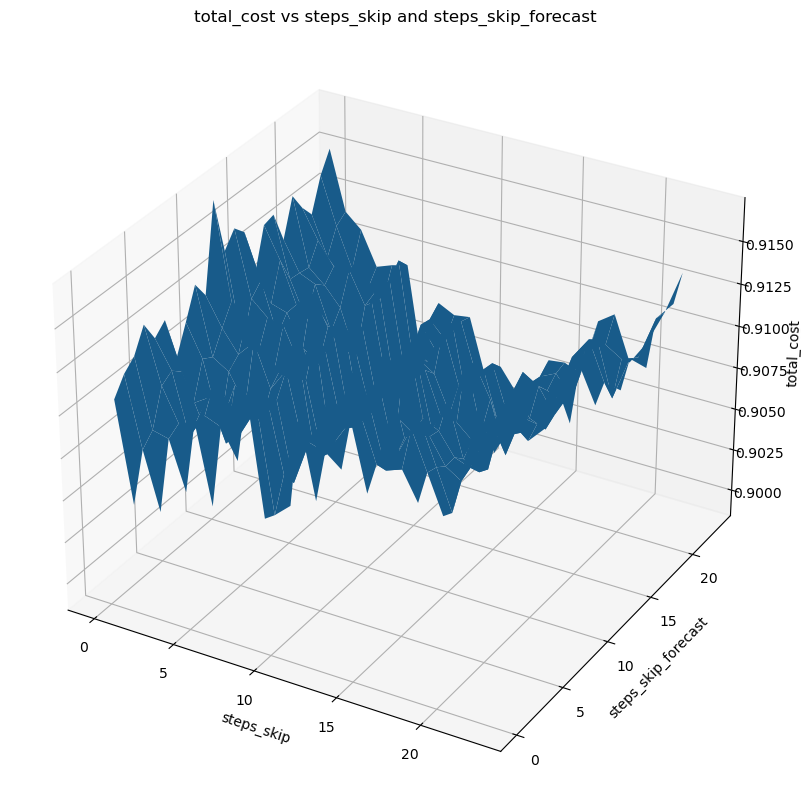

In [ ]:
# make a 3D plot from df
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
X = np.arange(0, 24)
Y = np.arange(0, 24)
X, Y = np.meshgrid(X, Y)
Z = df.values
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,edgecolor='none')
ax.set_xlabel('steps_skip')
ax.set_ylabel('steps_skip_forecast')
ax.set_zlabel('total_cost')
ax.set_title('total_cost vs steps_skip and steps_skip_forecast')
plt.show()


In [ ]:
case_study = "together"
phase_num = 3
total_steps = 9000
n_scen = 1
tc = {}
for steps_skip in [1]:
    tc[steps_skip] = {}
    for steps_skip_forecast in range(steps_skip, 25):
        if steps_skip_forecast < steps_skip:
            continue
        file_name = f"data/together_forecast/phase_{phase_num}_forecast_sampled_1h.csv"
        scenario_gen = ScenarioFile_sliding(file_name, n_scenarios=1, steps_ahead=24, steps_skip=steps_skip_forecast)
        log_exten = f"debug_logs/gurobi_phase_{phase_num}_step_leap_{steps_skip}_forecast_step_{steps_skip_forecast}.csv"
        manager = GurobiMPC(0, steps_skip=steps_skip, file_name=log_exten)
        agent_used = GeneralAgent(scenario_gen, manager)
        tc_temp, _, _, _ = evaluate(agent_used, total_steps=total_steps, phase_num=phase_num)
        tc[steps_skip][steps_skip_forecast] = tc_temp
        #ts_dict[steps_skip][steps_skip_forecast] = tc_temp

Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episo

In [ ]:
case_study = "together"
total_steps = 9000
phase_num = 1
n_scen = 1
ts_dict = {}
# iterate over combinations of steps_skip and steps_skip_forecast from 1 to 14 but steps_skip_forecast >= steps_skip
for steps_skip in tqdm(range(1, 25)):
    ts_dict[steps_skip] = {}
    steps_skip_forecast = steps_skip
    file_name = f"data/together_forecast/phase_{phase_num}_forecast_sampled_1h.csv"
    scenario_gen = ScenarioFile_sliding(file_name, n_scenarios=1, steps_ahead=24, steps_skip=steps_skip_forecast)
    log_exten = f"debug_logs/gurobi_phase_{phase_num}_step_leap_{steps_skip}_forecast_step_{steps_skip_forecast}.csv"
    manager = GurobiMPC(0, steps_skip=steps_skip, file_name=log_exten)
    agent_used = GeneralAgent(scenario_gen, manager)
    tc_temp, _, _, _ = evaluate(agent_used, total_steps=total_steps, phase_num=phase_num)
    ts_dict[steps_skip][steps_skip_forecast] = tc_temp

In [ ]:
# ts_dict to dataframe
df = pd.DataFrame.from_dict(ts_dict)
# save to csv
df.to_csv("stability_score_study_diagonals_phase1.csv")

In [ ]:
case_study = "together"
total_steps = 9000
phase_num = 3
n_scen = 1
ts_dict = {}
# iterate over combinations of steps_skip and steps_skip_forecast from 1 to 14 but steps_skip_forecast >= steps_skip
for steps_skip in tqdm(range(1, 25)):
    ts_dict[steps_skip] = {}
    steps_skip_forecast = steps_skip
    file_name = f"data/together_forecast/phase_{phase_num}_forecast_sampled_1h.csv"
    scenario_gen = ScenarioFile_sliding(file_name, n_scenarios=1, steps_ahead=24, steps_skip=steps_skip_forecast)
    log_exten = f"debug_logs/gurobi_phase_{phase_num}_step_leap_{steps_skip}_forecast_step_{steps_skip_forecast}.csv"
    manager = GurobiMPC(0, steps_skip=steps_skip, file_name=log_exten)
    agent_used = GeneralAgent(scenario_gen, manager)
    tc_temp, _, _, _ = evaluate(agent_used, total_steps=total_steps, phase_num=phase_num)
    ts_dict[steps_skip][steps_skip_forecast] = tc_temp

  0%|          | 0/24 [00:00<?, ?it/s]

Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num episodes: 0
Num Steps: 2000, Num episodes: 0
Num Steps: 2100, Num episodes: 0
Num Steps: 2200, Num episodes: 0
Num Steps: 2300, Num episodes: 0
Num Steps: 2400, Num episodes: 0
Num Steps: 2500, Num episodes: 0
Num Steps: 2600, Num episodes: 0
Num Steps: 2700, Num episodes: 0
Num Steps: 2800, Num episodes: 0
Num Steps: 2900, Num episodes: 0
Num Steps: 3000, Num episo

  4%|▍         | 1/24 [02:37<1:00:31, 157.91s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8133827976843321, 'emmision_cost': 0.9493868128566665, 'grid_cost': 0.9335977838244649}
=========================Completed=========================
Average Price Cost: 0.8133827976843321
Average Emmision Cost: 0.9493868128566665
Average Grid Cost: 0.9335977838244649
Average Total Cost: 0.8987891314551545
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

  8%|▊         | 2/24 [04:00<41:44, 113.84s/it]  

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8189744673888552, 'emmision_cost': 0.9550007444450843, 'grid_cost': 0.9386150915717107}
=========================Completed=========================
Average Price Cost: 0.8189744673888552
Average Emmision Cost: 0.9550007444450843
Average Grid Cost: 0.9386150915717107
Average Total Cost: 0.9041967678018833
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 12%|█▎        | 3/24 [04:59<30:56, 88.40s/it] 

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8211194352716785, 'emmision_cost': 0.9553137134026712, 'grid_cost': 0.9342244584168646}
=========================Completed=========================
Average Price Cost: 0.8211194352716785
Average Emmision Cost: 0.9553137134026712
Average Grid Cost: 0.9342244584168646
Average Total Cost: 0.9035525356970714
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 17%|█▋        | 4/24 [05:44<23:48, 71.43s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8172036105875958, 'emmision_cost': 0.95765185099568, 'grid_cost': 0.9387527589495147}
=========================Completed=========================
Average Price Cost: 0.8172036105875958
Average Emmision Cost: 0.95765185099568
Average Grid Cost: 0.9387527589495147
Average Total Cost: 0.9045360735109301
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num epi

 21%|██        | 5/24 [06:23<18:52, 59.61s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8218525553196193, 'emmision_cost': 0.9615063066151894, 'grid_cost': 0.9270050321809409}
=========================Completed=========================
Average Price Cost: 0.8218525553196193
Average Emmision Cost: 0.9615063066151894
Average Grid Cost: 0.9270050321809409
Average Total Cost: 0.9034546313719165
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 25%|██▌       | 6/24 [06:56<15:14, 50.80s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8195469260275303, 'emmision_cost': 0.9647083223383683, 'grid_cost': 0.9336459773515807}
=========================Completed=========================
Average Price Cost: 0.8195469260275303
Average Emmision Cost: 0.9647083223383683
Average Grid Cost: 0.9336459773515807
Average Total Cost: 0.9059670752391598
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 29%|██▉       | 7/24 [07:27<12:30, 44.15s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8177172298031976, 'emmision_cost': 0.9632926637938495, 'grid_cost': 0.9258201020896533}
=========================Completed=========================
Average Price Cost: 0.8177172298031976
Average Emmision Cost: 0.9632926637938495
Average Grid Cost: 0.9258201020896533
Average Total Cost: 0.9022766652289
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num ep

 33%|███▎      | 8/24 [07:54<10:19, 38.75s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.820040372193956, 'emmision_cost': 0.9641024531782361, 'grid_cost': 0.9243787836433299}
=========================Completed=========================
Average Price Cost: 0.820040372193956
Average Emmision Cost: 0.9641024531782361
Average Grid Cost: 0.9243787836433299
Average Total Cost: 0.9028405363385072
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num e

 38%|███▊      | 9/24 [08:19<08:37, 34.50s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8185031058476117, 'emmision_cost': 0.9640775032626853, 'grid_cost': 0.9261471573113229}
=========================Completed=========================
Average Price Cost: 0.8185031058476117
Average Emmision Cost: 0.9640775032626853
Average Grid Cost: 0.9261471573113229
Average Total Cost: 0.9029092554738734
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 42%|████▏     | 10/24 [08:45<07:26, 31.90s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8186131273542755, 'emmision_cost': 0.9652442970520063, 'grid_cost': 0.9299494870346103}
=========================Completed=========================
Average Price Cost: 0.8186131273542755
Average Emmision Cost: 0.9652442970520063
Average Grid Cost: 0.9299494870346103
Average Total Cost: 0.9046023038136308
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 46%|████▌     | 11/24 [09:09<06:22, 29.41s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8162302076440244, 'emmision_cost': 0.9661633787862445, 'grid_cost': 0.926411500677147}
=========================Completed=========================
Average Price Cost: 0.8162302076440244
Average Emmision Cost: 0.9661633787862445
Average Grid Cost: 0.926411500677147
Average Total Cost: 0.9029350290358052
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num e

 50%|█████     | 12/24 [09:31<05:27, 27.32s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8148493748275493, 'emmision_cost': 0.9702084700974887, 'grid_cost': 0.9393481616303916}
=========================Completed=========================
Average Price Cost: 0.8148493748275493
Average Emmision Cost: 0.9702084700974887
Average Grid Cost: 0.9393481616303916
Average Total Cost: 0.9081353355184766
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 54%|█████▍    | 13/24 [09:53<04:39, 25.41s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8164661578812312, 'emmision_cost': 0.9642852430719498, 'grid_cost': 0.9250548636648961}
=========================Completed=========================
Average Price Cost: 0.8164661578812312
Average Emmision Cost: 0.9642852430719498
Average Grid Cost: 0.9250548636648961
Average Total Cost: 0.901935421539359
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num 

 58%|█████▊    | 14/24 [10:12<03:55, 23.60s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8177860510683344, 'emmision_cost': 0.9647303339081748, 'grid_cost': 0.9202091669532035}
=========================Completed=========================
Average Price Cost: 0.8177860510683344
Average Emmision Cost: 0.9647303339081748
Average Grid Cost: 0.9202091669532035
Average Total Cost: 0.9009085173099042
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 62%|██████▎   | 15/24 [10:33<03:26, 22.94s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8184588663628158, 'emmision_cost': 0.9650166137127233, 'grid_cost': 0.9322004900141023}
=========================Completed=========================
Average Price Cost: 0.8184588663628158
Average Emmision Cost: 0.9650166137127233
Average Grid Cost: 0.9322004900141023
Average Total Cost: 0.9052253233632138
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 67%|██████▋   | 16/24 [10:52<02:52, 21.51s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8205391832446465, 'emmision_cost': 0.9653371819049225, 'grid_cost': 0.927141027388895}
=========================Completed=========================
Average Price Cost: 0.8205391832446465
Average Emmision Cost: 0.9653371819049225
Average Grid Cost: 0.927141027388895
Average Total Cost: 0.9043391308461546
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num e

 71%|███████   | 17/24 [11:09<02:21, 20.26s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8214873058813428, 'emmision_cost': 0.9637646519848581, 'grid_cost': 0.9321228745191772}
=========================Completed=========================
Average Price Cost: 0.8214873058813428
Average Emmision Cost: 0.9637646519848581
Average Grid Cost: 0.9321228745191772
Average Total Cost: 0.9057916107951259
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 75%|███████▌  | 18/24 [11:26<01:56, 19.43s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8227432406789678, 'emmision_cost': 0.9615908212529137, 'grid_cost': 0.9318486296475454}
=========================Completed=========================
Average Price Cost: 0.8227432406789678
Average Emmision Cost: 0.9615908212529137
Average Grid Cost: 0.9318486296475454
Average Total Cost: 0.9053942305264756
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 79%|███████▉  | 19/24 [11:43<01:33, 18.69s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8234114703315492, 'emmision_cost': 0.960081093886279, 'grid_cost': 0.9330463280354351}
=========================Completed=========================
Average Price Cost: 0.8234114703315492
Average Emmision Cost: 0.960081093886279
Average Grid Cost: 0.9330463280354351
Average Total Cost: 0.9055129640844211
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num e

 83%|████████▎ | 20/24 [12:00<01:11, 17.99s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8228899564496376, 'emmision_cost': 0.9600929827879222, 'grid_cost': 0.9362107765688614}
=========================Completed=========================
Average Price Cost: 0.8228899564496376
Average Emmision Cost: 0.9600929827879222
Average Grid Cost: 0.9362107765688614
Average Total Cost: 0.906397905268807
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num 

 88%|████████▊ | 21/24 [12:16<00:52, 17.51s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8288913941900009, 'emmision_cost': 0.9593305515973913, 'grid_cost': 0.9330674626960245}
=========================Completed=========================
Average Price Cost: 0.8288913941900009
Average Emmision Cost: 0.9593305515973913
Average Grid Cost: 0.9330674626960245
Average Total Cost: 0.9070964694944722
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

 92%|█████████▏| 22/24 [12:32<00:33, 16.97s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8295755793187335, 'emmision_cost': 0.9589983852645821, 'grid_cost': 0.936137071268371}
=========================Completed=========================
Average Price Cost: 0.8295755793187335
Average Emmision Cost: 0.9589983852645821
Average Grid Cost: 0.936137071268371
Average Total Cost: 0.9082370119505622
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num e

 96%|█████████▌| 23/24 [12:48<00:16, 16.85s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.8330234743581849, 'emmision_cost': 0.9614703601217096, 'grid_cost': 0.9410524821578488}
=========================Completed=========================
Average Price Cost: 0.8330234743581849
Average Emmision Cost: 0.9614703601217096
Average Grid Cost: 0.9410524821578488
Average Total Cost: 0.9118487722125811
Starting local evaluation
Num Steps: 100, Num episodes: 0
Num Steps: 200, Num episodes: 0
Num Steps: 300, Num episodes: 0
Num Steps: 400, Num episodes: 0
Num Steps: 500, Num episodes: 0
Num Steps: 600, Num episodes: 0
Num Steps: 700, Num episodes: 0
Num Steps: 800, Num episodes: 0
Num Steps: 900, Num episodes: 0
Num Steps: 1000, Num episodes: 0
Num Steps: 1100, Num episodes: 0
Num Steps: 1200, Num episodes: 0
Num Steps: 1300, Num episodes: 0
Num Steps: 1400, Num episodes: 0
Num Steps: 1500, Num episodes: 0
Num Steps: 1600, Num episodes: 0
Num Steps: 1700, Num episodes: 0
Num Steps: 1800, Num episodes: 0
Num Steps: 1900, Num

100%|██████████| 24/24 [13:04<00:00, 32.67s/it]

Episode complete: 1 | Latest episode metrics: {'price_cost': 0.818231561804187, 'emmision_cost': 0.969785821789921, 'grid_cost': 0.9355457952933189}
=========================Completed=========================
Average Price Cost: 0.818231561804187
Average Emmision Cost: 0.969785821789921
Average Grid Cost: 0.9355457952933189
Average Total Cost: 0.9078543929624757


In [ ]:
# ts_dict to dataframe
df = pd.DataFrame.from_dict(ts_dict)
# save to csv
df.to_csv("stability_score_study_diagonals_phase3.csv")

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.898789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.904197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.903553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.904536,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.903455,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,0.905967,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.902277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902841,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.904602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
